<a href="https://colab.research.google.com/github/Vaibhavs10/how-to-asr/blob/main/01_how_to_asr_big_picture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build with Audio the easy way!
Tutorial by: *Vaibhav Srivastav* [@reach_vb](https://twitter.com/reach_vb)

Curious to know about me? [https://vaibhav.wiki/about](https://vaibhav.wiki/about) 

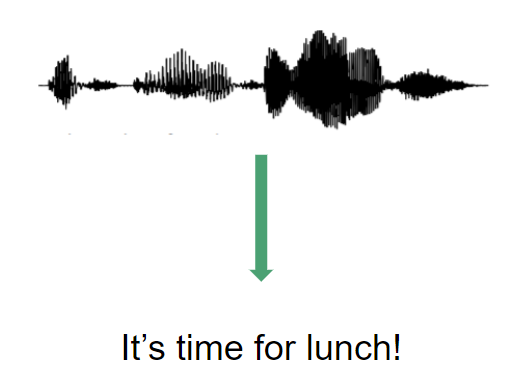


It's a method of converting audio to text, i.e. spoken language (waveform) to meanigful and comprehensible text.

In [1]:
!pip install -q transformers datasets

     |████████████████████████████████| 4.4 MB 5.1 MB/s 
     |████████████████████████████████| 362 kB 58.7 MB/s 
     |████████████████████████████████| 6.6 MB 47.6 MB/s 
     |████████████████████████████████| 101 kB 12.0 MB/s 
     |████████████████████████████████| 596 kB 57.9 MB/s 
     |████████████████████████████████| 1.1 MB 57.8 MB/s 
     |████████████████████████████████| 212 kB 62.0 MB/s 
     |████████████████████████████████| 140 kB 61.7 MB/s 
     |████████████████████████████████| 127 kB 48.9 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 271 kB 65.8 MB/s 
     |████████████████████████████████| 144 kB 70.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import datasets
from IPython.display import Audio

## Let's look at an example!

We'll use the Fleurs dataset for our initial tests and then work our way to another datasets.

*Fleurs is the speech version of the FLoRes machine translation benchmark. We use 2009 n-way parallel sentences from the FLoRes dev and devtest publicly available sets, in 102 languages.*

https://huggingface.co/datasets/google/fleurs

In [3]:
audio_files = datasets.load_dataset("google/fleurs", split="validation", name="en_us")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset fleurs downloaded and prepared to /root/.cache/huggingface/datasets/google___fleurs/en_us/2.0.0/fd7c904e931315f3f4154cc1cea6de0d8c687cdf06e775e2e6ae76e96fdeaaae. Subsequent calls will reuse this data.


Alright, the dataset is now downloaded, let's look at what it looks like.

In [4]:
audio_files[0]

{'audio': {'array': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         6.66975975e-05, 6.33001328e-05, 6.90817833e-05]),
  'path': '1936362254666654691.wav',
  'sampling_rate': 16000},
 'gender': 1,
 'id': 1554,
 'lang_group_id': 0,
 'lang_id': 19,
 'language': 'English',
 'num_samples': 52800,
 'path': '1936362254666654691.wav',
 'raw_transcription': 'He built a WiFi door bell, he said.',
 'transcription': 'he built a wifi door bell he said'}

and what does it hear like?

In [5]:
Audio(audio_files[0]["audio"]["array"], rate=audio_files[0]["audio"]["sampling_rate"])

and the transcription?

In [6]:
audio_files[0]["raw_transcription"]

'He built a WiFi door bell, he said.'

Nice! Your turn, pick another number an try to hear the audio and its transcription, below! (5 minutes)

In [7]:
# Put your code here

In ASR, our goal is to learn to map these audios to the corresponding transcription for fun and profit :)

## Alright, we have the data lets see what the machines can do!

In [8]:
import datasets
from transformers import pipeline

In [9]:
pipe = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-base-960h")

Downloading:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/360M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/163 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/159 [00:00<?, ?B/s]

In [10]:
pipe(audio_files[0]["audio"]["array"])

{'text': 'HE BUILT A WIFFIE DOOR BELL HE SAID'}

That's it, our job here is done, we can go home now! :p

### Okay, maybe not, before we demystify this, try this out on the files you experimented with earlier! (5 minutes)

In [11]:
# Put your code here

### Now, how about we try a different model with the same pipeline?

Head over to: https://huggingface.co/models?pipeline_tag=automatic-speech-recognition&sort=downloads and pick a model, replace it in the pipe function and get recognising <3

In [12]:
# Put your code here

### Interesting results right? but, why do you think this is a difficult probelm to solve? 

(2 minute discussion)

Let's look at different variations of “eh”

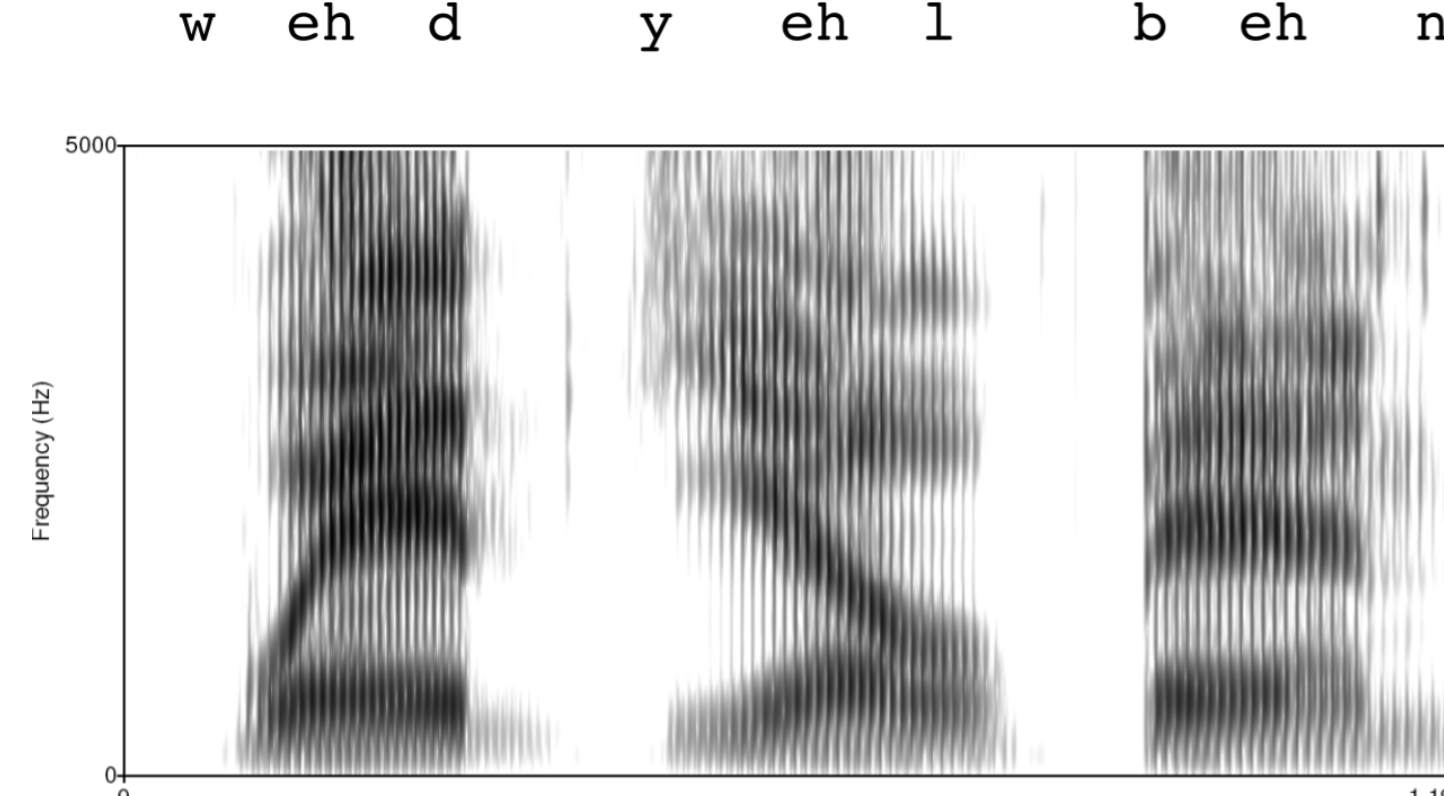

Different variation of "iy" in context
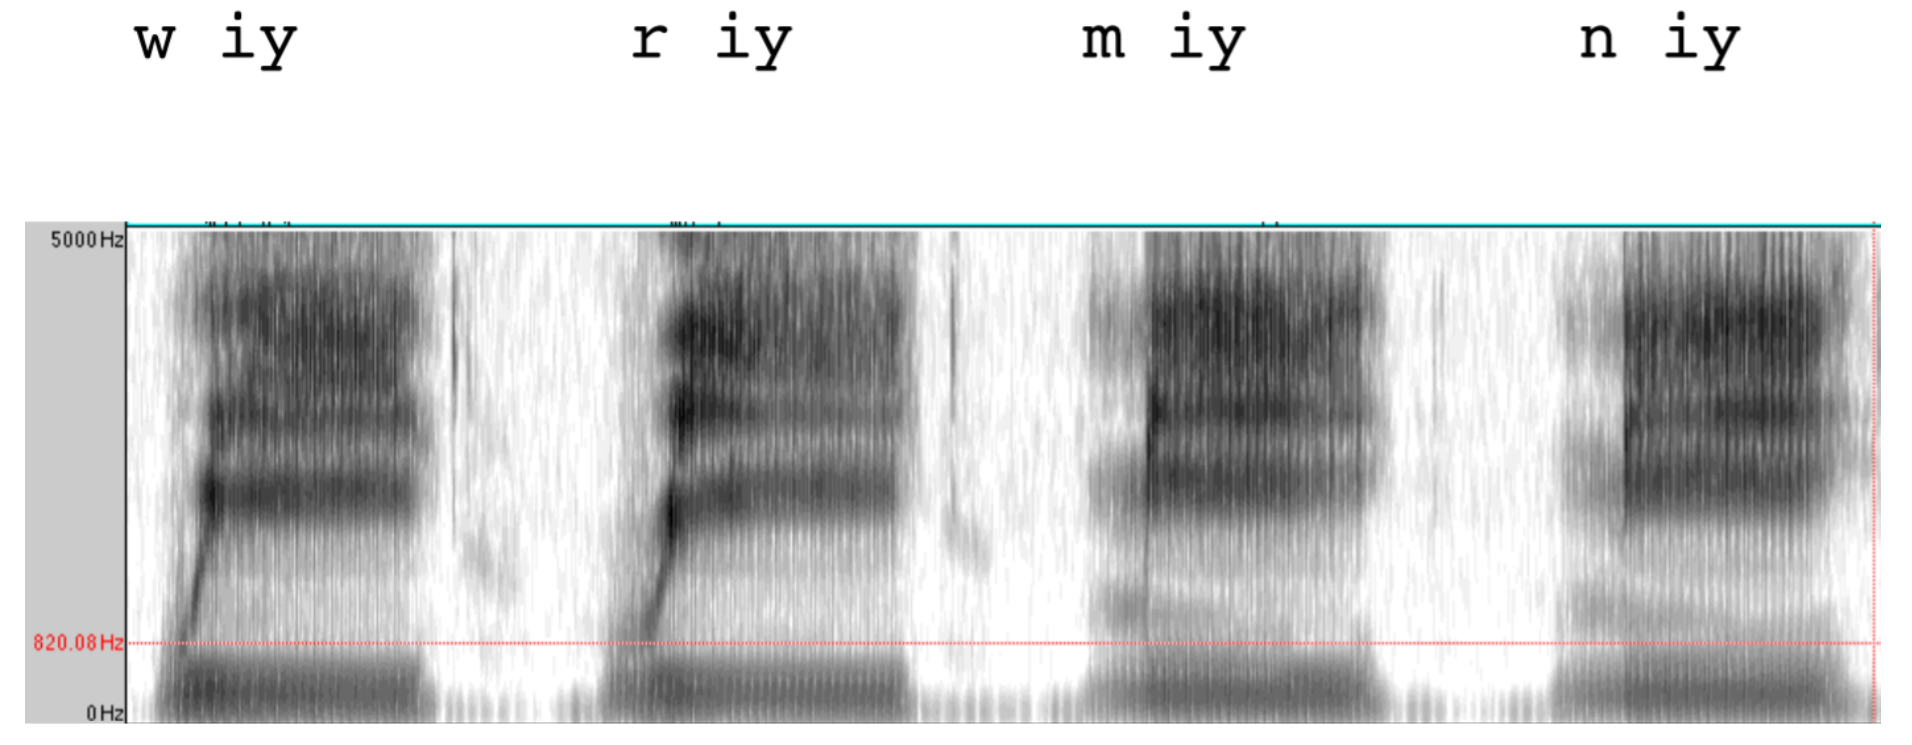

### Let's dig into the pipeline a bit more, what does the model take as an input and output when it processes the audio?

In [13]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
from datasets import load_dataset
import torch

In [14]:
 # load model and tokenizer
 processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
 model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
 
 # tokenize
 input_values = processor(audio_files[0]["audio"]["array"], return_tensors="pt", padding="longest", sampling_rate=audio_files[0]["audio"]["sampling_rate"]).input_values  # Batch size 1
 
 # retrieve logits
 logits = model(input_values).logits
 
 # take argmax and decode
 predicted_ids = torch.argmax(logits, dim=-1)
 transcription = processor.batch_decode(predicted_ids)
 transcription

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


['HE BUILT A WIFFIE DOOR BELL HE SAID']

### Um, wait, what the fook?

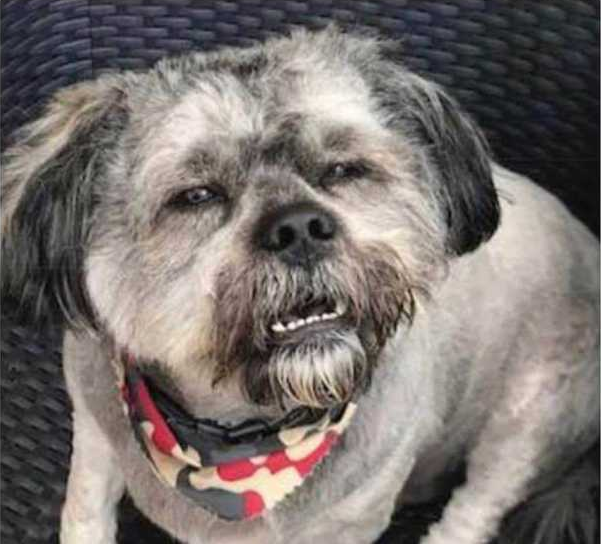

Let's unpack this a bit..

Architecture-wise this is just a simple Encoder-Decoder architecture.

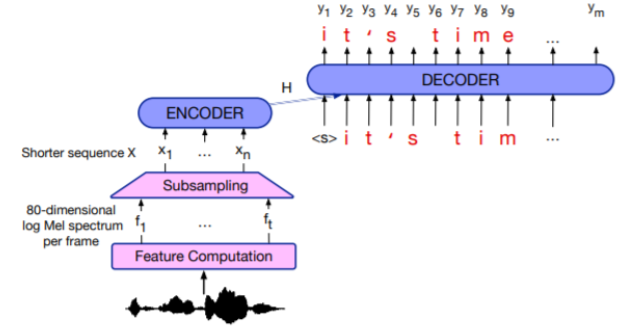

In [15]:
# load model and tokenizer
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
# tokenize
input_values = processor(audio_files[0]["audio"]["array"], return_tensors="pt", padding="longest", sampling_rate=audio_files[0]["audio"]["sampling_rate"]).input_values  # Batch size 1
print(input_values)

tensor([[0.0010, 0.0010, 0.0010,  ..., 0.0771, 0.0732, 0.0798]])


In [25]:
# What's the input size here?
print(len(input_values[0]))

52800


In [26]:
# retrieve logits
logits = model(input_values).logits
print(logits)

tensor([[[ 15.0488, -28.2588, -27.9532,  ...,  -5.6906,  -8.1803,  -7.5875],
         [ 14.8388, -27.9569, -27.6585,  ...,  -5.6137,  -8.0627,  -7.6666],
         [ 14.7234, -27.9090, -27.6080,  ...,  -5.6495,  -8.0152,  -7.6182],
         ...,
         [ 14.4861, -26.4134, -26.1402,  ...,  -4.4179,  -7.4918,  -7.3189],
         [ 14.5570, -27.4176, -27.1292,  ...,  -5.3675,  -7.9153,  -7.3807],
         [ 14.6926, -28.1706, -27.8805,  ...,  -5.8287,  -8.5842,  -7.6913]]],
       grad_fn=<AddBackward0>)


In [27]:
# what's the output size?
print(len(logits[0]))

164


### Yo! What are these logits tho?

Let's look at them in a bit more detail: https://huggingface.co/facebook/wav2vec2-base-960h/resolve/main/vocab.json

In [ ]:
# so we essentially have model output a probability for each and every character in the vocabulary
# It's all a big classifier in the end :)

In [44]:
# take argmax
predicted_ids = torch.argmax(logits, dim=-1)
print(predicted_ids)

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  0,  5,  0,  0,  0,  4,
          4, 24, 16, 16, 10,  0, 15,  0,  0,  6,  0,  0,  4,  4,  4,  7,  0,  4,
          0, 18,  0,  0,  0,  0,  0, 10,  0,  0, 20,  0,  0,  0, 20,  0,  0,  0,
         10,  0,  0,  5,  0,  4, 14, 14,  8,  0,  0,  8, 13, 13,  0,  0,  4,  0,
         24,  0,  0,  5, 15,  0,  0, 15,  0,  0,  4,  4,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0, 11, 11,  0,  5,  0,  4,  4,  0, 12, 12,
          0,  0,  7,  7, 10,  0,  0, 14,  4,  4,  4,  4,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0]])


In [38]:
# and decode
transcription = processor.batch_decode(predicted_ids)
transcription

['HE BUILT A WIFFIE DOOR BELL HE SAID']

### All of this makes sense, but how are so many outputs being mapped to just a few outputs?

https://arxiv.org/pdf/2006.11477.pdf 

Specifically look at the feature encoder - The feature encoder contains seven blocks and the temporal convolutions in each block have 512
channels with strides (5,2,2,2,2,2,2) and kernel widths (10,3,3,3,3,2,2)

In [28]:
52800/320

165.0

### But, but, but, we all speak words differently, no?

A single word might just be 5 letter long but may take more than 2 seconds when verbalised.

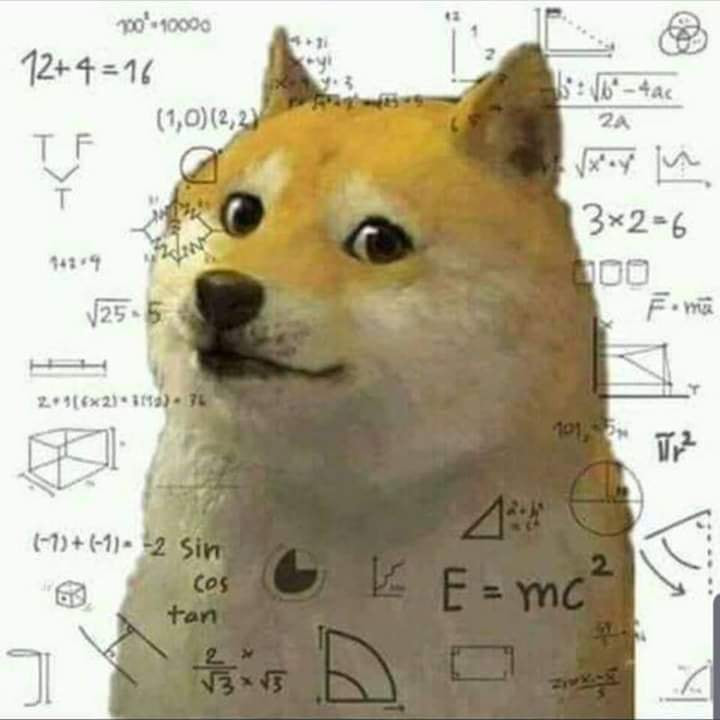

The question then becomes that how do we exactly know which part of X (audio) maps to which part of Y (text)?

Enters CTC, Connectionist Temporal Classification (https://distill.pub/2017/ctc/)

1. output a single character for every frame of the input
2. each input is mapped to an output
3. apply a collapsing function that combines identical letters
4. resulting in shorter output text sequence

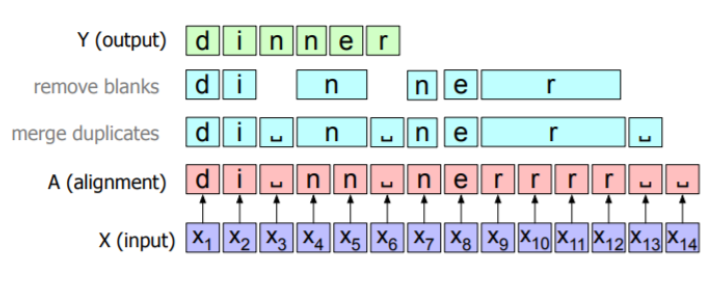